In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv("Downloads/zillow_cleaned_no_nulls.csv", index_col=0)

In [21]:
df.index = pd.to_datetime(df.index)

In [25]:
by_year = df.groupby([df.index.year, df.zip]).agg({'regionid': 'min', 'sizerank': 'min', 'value': 'mean'})

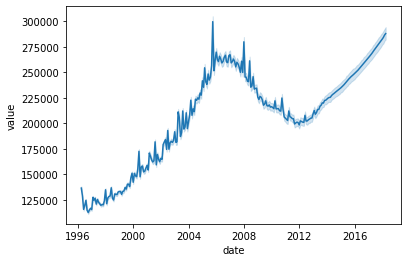

In [30]:
sns.lineplot(x = df.index.get_level_values(0),
            y = df.value)
plt.show()

In [32]:
by_year

regionid  sizerank          value
date zip                                     
1996 1001      58196      5851  112222.222222
     1002      58197      4200  158444.444444
     1005      58200     11214  103944.444444
     1007      58201      6851  131288.888889
     1008      58202     14548  116877.777778
...              ...       ...            ...
2018 99709    100384      4527  262375.000000
     99712    100387      8439  274025.000000
     99801    100459      4107  410475.000000
     99835    100473      8659  400825.000000
     99901    100478      7294  299725.000000

[338629 rows x 3 columns]

In [34]:
values_2018 = by_year.loc[by_year.index.get_level_values(0) == 2018].value
values_1996 = by_year.loc[by_year.index.get_level_values(0) == 1996].value

In [69]:
zip_growth = pd.DataFrame(np.log(values_2018.values) - np.log(values_1996.values), columns = ['growth'])
zip_growth['zipcodes'] = values_2018.index.get_level_values(1)
zip_growth = zip_growth.sort_values(by='growth', ascending=False)

In [117]:
top_10 = zip_growth.head(10)
col_order = list(top_10['zipcodes'])

In [118]:
col_order

[10021, 10011, 10014, 11217, 11231, 11238, 31561, 11205, 2116, 94563]

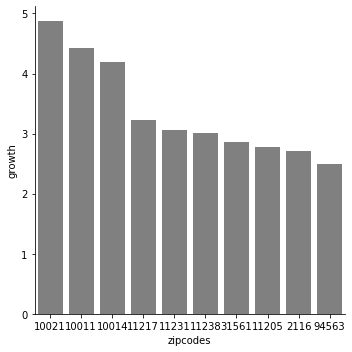

In [120]:
sns.catplot(x = 'zipcodes',
            y = 'growth',
            data = top_10,
            kind = 'bar',
            color = 'gray',
            order= col_order,
       )
plt.show()

In [131]:
df_zips = df.groupby('zip').agg({'city':'min'})
df_zips.loc[col_order]

,city
zip,
10021,New York
10011,New York
10014,New York
11217,New York
11231,New York
11238,New York
31561,Sea Island
11205,New York
2116,Boston
